<a href="https://colab.research.google.com/github/pfedu/face_recognition/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## face_recognitionパッケージをインストール

In [ ]:
!pip install face_recognition

## 画像をダウンロード

In [ ]:
!wget -O known.jpg https://raw.githubusercontent.com/pfedu/face_recognition/main/boy.jpg
!wget -O unknown.jpg https://raw.githubusercontent.com/pfedu/face_recognition/main/unknown.jpg

--2020-11-24 00:48:20--  https://raw.githubusercontent.com/pfedu/face_recognition/main/boy.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69926 (68K) [image/jpeg]
Saving to: ‘known.jpg’

known.jpg           100%[===================>]  68.29K  --.-KB/s    in 0.001s  

2020-11-24 00:48:20 (55.4 MB/s) - ‘known.jpg’ saved [69926/69926]

--2020-11-24 00:48:20--  https://raw.githubusercontent.com/pfedu/face_recognition/main/unknown.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172654 (169K) [image/jpeg]
Saving to: ‘unknown.jpg’

unknow

## 顔認識処理

### 認識したい人の顔が写っている画像を読み込む

ここでは、複数の人が写っている写真の中から、特定の人物を識別する例を示します。

まずは識別したい人の画像を読み込みます。

In [ ]:
import face_recognition
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display


# 認識したい顔画像を読み込む
known_image = face_recognition.load_image_file("known.jpg")
# display(Image.fromarray(known_image))


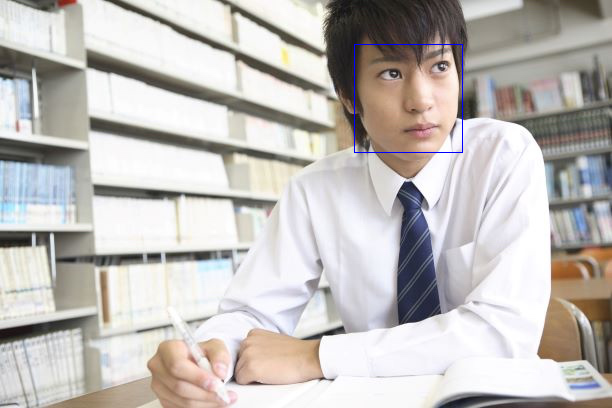

In [ ]:
# Face Recognitionライブラリを使用して、顔位置の検出
face_locations = face_recognition.face_locations(known_image)

# 読み込んだ画像に顔が一つしかないことを確認する
if len(face_locations) != 1:
    print("Error: This image couldn't be accepted.")
    exit(keep_kernel=True)

# 表示用の処理
# Pillowというライブラリを使用して、PIL形式のイメージを作成
pil_image = Image.fromarray(known_image)
# PillowのImageDrawインスタンスを作成
draw = ImageDraw.Draw(pil_image)

# 顔の位置にボックスを描くためのループ
for (top, right, bottom, left) in face_locations:
    # 検出した顔位置にボックスを描く
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

del draw

# 結果の表示
display(pil_image)

# Face Recognitionライブラリを使用して、認識したい顔画像を128次元で符号化する処理を行う
known_face_encodings = face_recognition.face_encodings(known_image)


### 複数人が写っている画像から、いちばん似ている人を見つける

ここでは、認識したい人が写っている他の画像を読み込んで、その画像の中から一番似ている人を見つける例を示します。

In [ ]:
# 複数の人が写っている画像を読み込む
unknown_image = face_recognition.load_image_file("unknown.jpg")
# display(Image.fromarray(unknown_image))

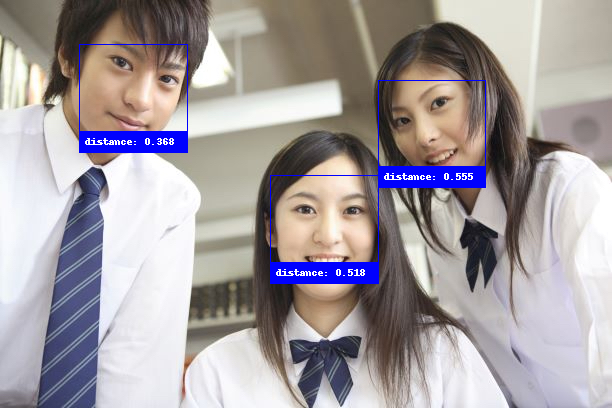

In [ ]:
# Face Recognitionライブラリを使用して、顔位置の検出
face_locations = face_recognition.face_locations(unknown_image)

# Face Recognitionライブラリを使用して、画像に含まれる顔を符号化する
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# 表示用の処理
# PIL形式のイメージを作成する
pil_image = Image.fromarray(unknown_image)
# PillowのImageDrawインスタンスを作成
draw = ImageDraw.Draw(pil_image)

# 画像から、顔の位置を推定するループ
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # Face Recognitionライブラリを使用して、画像に含まれる顔と認識したい人の顔の特徴の距離を算出します
    # この値が小さいほど似ていることになります
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    # display(face_distances)
    distance = "distance: {:.3f}".format(face_distances[0])
    # 検出した顔位置にボックスを描く
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))
    # 距離を出力する。
    text_width, text_height = draw.textsize(distance)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), distance, fill=(255, 255, 255, 255))

# メモリ上のImageDrawインスタンスを削除
del draw

# 結果の表示
display(pil_image)